In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Loading datasets
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle=False)


100.0%
100.0%
100.0%
100.0%


In [2]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.net(x)

model = DigitClassifier()


In [3]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [4]:
for epoch in range(5):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


Epoch 1, Loss: 0.1568
Epoch 2, Loss: 0.1075
Epoch 3, Loss: 0.0603
Epoch 4, Loss: 0.1876
Epoch 5, Loss: 0.0771


In [5]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 97.43%


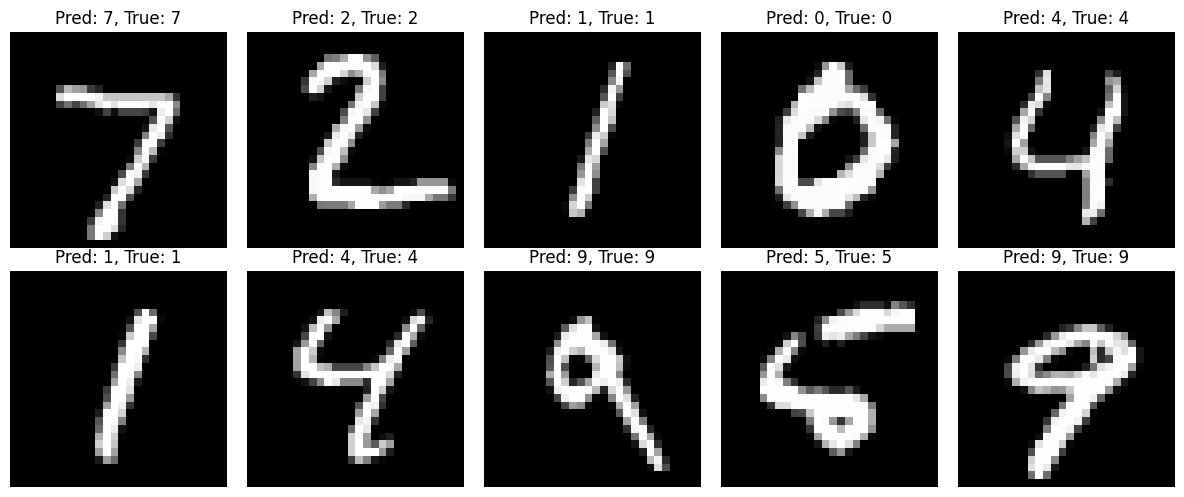

In [6]:
import matplotlib.pyplot as plt

# Moving model to CPU for evaluation (in case it's on GPU)
model.eval()
model.cpu()

# Getting some test images and predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# Running through the model
with torch.no_grad():
    output = model(example_data)

# Getting predictions
_, preds = torch.max(output, 1)

# Showing the first 10 images and predictions
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Pred: {preds[i].item()}, True: {example_targets[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()
